# Studying hits from MGnify HMMER


In [15]:
import os
from pathlib import Path

# ------------------ INPUT (EDIT THESE) ------------------
PROJECT_ROOT = Path.cwd().parents[0]          # go up from notebooks/ to project/
DATA_DIR     = PROJECT_ROOT / "data"
SCRIPTS_PATH = PROJECT_ROOT / "src" / "mgnify_json"

# Describe the query that produced this MGnify similarity search
query_desc = "EC3.1.1.74; PF00183"           # e.g. "EC3.1.1.74; PF00023"  <- EDIT

# MGnify job/result ID (or any unique label for this JSON)
JOB_ID = "EE98831C-BE0F-11F0-9189-305B869BB15A.1"   # <- EDIT DEPENDING ON THE JOB ID

# Where the JSON is stored: all JSONs in the same folder, no EC subfolder
JSONS_ROOT = DATA_DIR / "raw" / "jsons"
JSONS_ROOT.mkdir(parents=True, exist_ok=True)

JSON_PATH = JSONS_ROOT / f"{JOB_ID}.json"    # .../data/raw/jsons/EE98...1.json.  # <- EDIT TO CHANGE A CUSTOM PATH FOR THE JSON FILE


# ---------------- DERIVED PATHS ----------------
# Per-job output folder for parsed HMMER-like hits (can be wherever you want)
HMMER_DIR = DATA_DIR / "interim" / "hmmer_from_mgnify" / JOB_ID
HMMER_DIR.mkdir(parents=True, exist_ok=True)

# File paths for this job
INPUT_JSON = JSON_PATH
INPUT_CSV  = HMMER_DIR / f"{JOB_ID}.csv"     # where your JSON→CSV parser will write
CONTEXT_CSV  = HMMER_DIR / f"{JOB_ID}.context.csv"         # assembly-biome mapping


# ---------------- STORE QUERY DESCRIPTION IN README ----------------
# Single README in the jsons folder, one line per JOB_ID
README_QUERIES = JSONS_ROOT / "README_queries.tsv"

with README_QUERIES.open("a") as fh:
    # JOB_ID \t query_desc \t json_filename \t relative_path
    rel_json_path = INPUT_JSON.relative_to(PROJECT_ROOT)
    fh.write(f"{JOB_ID}\t{query_desc}\t{INPUT_JSON.name}\t{rel_json_path}\n")


# ---------------- EXPORT TO ENV (for bash cells) ----------------
os.environ["scripts_path"] = str(SCRIPTS_PATH)
os.environ["JOB_ID"]       = JOB_ID
os.environ["HMMER_DIR"]    = str(HMMER_DIR)
os.environ["INPUT_CSV"]    = str(INPUT_CSV)
os.environ["INPUT_JSON"]   = str(INPUT_JSON)
os.environ["PROJECT_ROOT"]   = str(PROJECT_ROOT)
os.environ["CONTEXT_CSV"]    = str(CONTEXT_CSV)

# ---------------- OPTIONAL: LOG ----------------
print("PROJECT_ROOT :", PROJECT_ROOT)
print("Scripts path :", SCRIPTS_PATH)
print("JSONS_ROOT   :", JSONS_ROOT)
print("JOB_ID       :", JOB_ID)
print("INPUT_JSON   :", INPUT_JSON)
print("HMMER_DIR    :", HMMER_DIR)
print("INPUT_CSV    :", INPUT_CSV)
print("README file  :", README_QUERIES)
print("CONTEXT_CSV  :", CONTEXT_CSV)

PROJECT_ROOT : /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus
Scripts path : /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/src/mgnify_json
JSONS_ROOT   : /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/raw/jsons
JOB_ID       : EE98831C-BE0F-11F0-9189-305B869BB15A.1
INPUT_JSON   : /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/raw/jsons/EE98831C-BE0F-11F0-9189-305B869BB15A.1.json
HMMER_DIR    : /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/interim/hmmer_from_mgnify/EE98831C-BE0F-11F0-9189-305B869BB15A.1
INPUT_CSV    : /Users

## For the HMMER output

Runs: `4_parse_hmmer_json`
Purpose:
- Convert an HMMER/MGnify-style **JSON results file** into a flat **CSV table**.
- Emits one row per detected domain within each hit.
- **If a hit has no`domains, emits a single empty row so it is not lost**

Outcome: `{JOB_ID_ph}.csv`

In [2]:
%%bash

echo ${scripts_path}
python ${scripts_path}/4_parse_hmmer_json.py \
  ${INPUT_JSON} \
  ${INPUT_CSV} \
  2>&1 | sed -n '1,200p'

/Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/src/mgnify_json


dom_hmm_name
Cutinase    2379
Name: count, dtype: int64


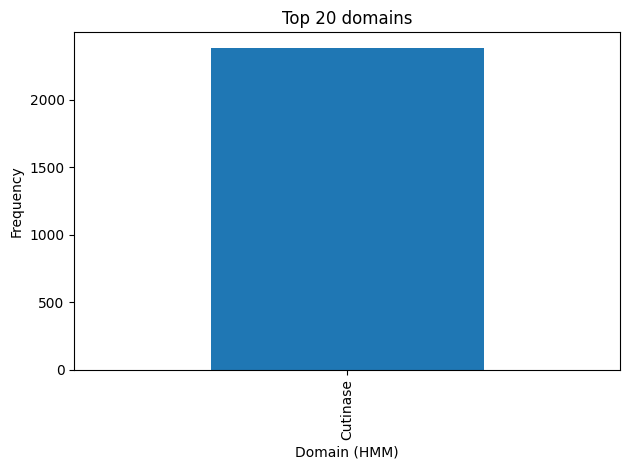

In [10]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

csv = Path(INPUT_CSV)  # ya es una ruta válida

df = pd.read_csv(csv)

# Filtra filas con dominio válido
df = df[df["dom_hmm_name"].notna() & (df["dom_hmm_name"]!="")]

# 1) Simple count by domain
counts = df["dom_hmm_name"].value_counts()
print(counts)

# Save table
#counts.to_csv("domain_counts.tsv", sep="\t", header=["count"])

# 2) Top 20 
ax = counts.head(20).plot(kind="bar")
ax.set_xlabel("Domain (HMM)")
ax.set_ylabel("Frequency")
ax.set_title("Top 20 domains")
plt.tight_layout()
plt.show()

#### In case no filtering is done

In [5]:
%%bash
head ${INPUT_CSV}

tail -n +2 ${INPUT_CSV} | cut -d',' -f1 | sort -u | wc -l


hit_acc,hit_name,hit_score,hit_bias,hit_pvalue,hit_evalue,n_domains,dom_bitscore,dom_bias,dom_ievalue,dom_cevalue,dom_aliL,dom_aliId,dom_aliSim,dom_hmm_from,dom_hmm_to,dom_hmm_acc,dom_hmm_name,dom_sq_from,dom_sq_to,dom_model_cov,dom_seq_cov,studies,assemblies,biomes,samples,extlink
MGYP005811077545,MGYP005811077545,209.1,1.9,-151.134601176536,1.7e-57,1,208.926940917969,1.87,1.9e-57,7.3e-63,221,0.505813953488372,0.947674418604651,1,172,PF01083.29,Cutinase,34,212,172,179,ERP136856|https://www.ebi.ac.uk/metagenomics/studies/ERP136856,ERZ10545953|https://www.ebi.ac.uk/metagenomics/assemblies/ERZ10545953,247,136856,https://www.ebi.ac.uk/metagenomics/proteins/MGYP005811077545
MGYP005810363429,MGYP005810363429,206.7,1.7,-149.394192524558,9.4e-57,1,206.45475769043,1.70,1.1e-56,4.2e-62,225,0.479768786127168,0.947976878612717,1,173,PF01083.29,Cutinase,38,217,173,180,ERP136856|https://www.ebi.ac.uk/metagenomics/studies/ERP136856,ERZ10545953|https://www.ebi.ac.uk/metagenomics/assemblies/ERZ1054595

### Link to biomes


This part reads a CSV containing MGnify assemblies, looks up the biome
associated with each assembly using the MGnify API, and writes an annotated
output file. A local cache is used to avoid repeated API calls.

#### Steps 

1. **Load input CSV** and find the `assemblies` column.
2. **Extract unique assembly IDs** (cleaning separators like `;` and `|`).
3. **If >500 assemblies**, randomly sample 500; otherwise use all.
4. For each assembly:
   - If already in the **cache**, reuse the cached Biome ID.
   - Otherwise:
     - Query MGnify: `assembly → sample → biome`
     - Save the result to both the output file and the cache.
5. **Deduplicate** and clean the final output and cache.

#### Output

- A `<input>.context.csv` file with `Assembly,Biome_ID`
- An updated, persistent cache: `erz_biome_cache.csv`

In [11]:
%%bash
set -uo pipefail    # safer: keep undefined-var + pipefail, drop -e

# --- ENSURE REQUIRED ENV VARS ---
: "${INPUT_CSV:?INPUT_CSV not set}"

# --- INPUTS ---
INPUT="${INPUT_CSV}"
OUT="${INPUT%.csv}.context.csv"
CACHE="${PROJECT_ROOT}/data/raw/erz_biome_cache.csv"

# --- REQUIREMENTS ---
command -v jq   >/dev/null 2>&1 || { echo "ERROR: jq required" >&2; exit 1; }
command -v curl >/dev/null 2>&1 || { echo "ERROR: curl required" >&2; exit 1; }
CURL='curl -sS --fail-with-body --retry 3 --connect-timeout 10 --max-time 30 --http1.1'

# --- CHECK INPUT EXISTS ---
[[ -f "$INPUT" ]] || { echo "ERROR: not found input CSV: $INPUT" >&2; exit 2; }

# --- INIT OUTPUT FILES ---
printf "Assembly,Biome_ID\n" > "$OUT"
[[ -f "$CACHE" ]] || printf "Assembly,Biome_ID\n" > "$CACHE"

# helper: retrieve from cache
get_cached_bid() {
  awk -F',' -v e="$1" 'NR>1 && $1==e {print $2; exit}' "$CACHE"
}

# --- Extract unique ERZ assemblies ---
ERZ_TMP="$(mktemp)"
awk -F',' '
  NR==1 {
    for(i=1;i<=NF;i++) {
      col=$i
      gsub(/\r/, "", col)
      gsub(/^[ \t]+|[ \t]+$/, "", col)
      h[col]=i
    }
    if(!("assemblies" in h)) {
      print "ERROR: missing header: assemblies" > "/dev/stderr"
      exit 2
    }
    A=h["assemblies"]
    next
  }
  {
    n=split($A,t,/;/)
    for(k=1;k<=n;k++){
      gsub(/^[ \t]+|[ \t]+$/, "", t[k])
      if(t[k]=="") continue
      split(t[k],u,/\|/)
      if(u[1]!="") print u[1]
    }
  }
' "$INPUT" | sort -u > "$ERZ_TMP"

TOTAL=$(wc -l < "$ERZ_TMP")
echo "Assemblies (unique) found: $TOTAL" >&2

# --- Downsample if >500 assemblies ---
ERZ_LIST="$ERZ_TMP"
if (( TOTAL > 500 )); then
  ERZ_SUBSET="$(mktemp)"
  if command -v shuf >/dev/null 2>&1; then
    shuf -n 500 "$ERZ_TMP" > "$ERZ_SUBSET"
  elif command -v gshuf >/dev/null 2>&1; then
    gshuf -n 500 "$ERZ_TMP" > "$ERZ_SUBSET"
  else
    # Reservoir sampling
    awk -v k=500 '
      BEGIN {
        s=ENVIRON["SEED"]
        if(s!="") srand(s)
      }
      NR<=k { a[NR]=$0; next }
      {
        i=int(rand()*NR)+1
        if(i<=k) a[i]=$0
      }
      END {
        n=(k<NR?k:NR)
        for(i=1;i<=n;i++) print a[i]
      }
    ' "$ERZ_TMP" > "$ERZ_SUBSET"
  fi
  ERZ_LIST="$ERZ_SUBSET"
  echo ">500 assemblies: using random subset of 500." >&2
else
  echo "≤500 assemblies: using full list." >&2
fi

TOTAL_LIST=$(wc -l < "$ERZ_LIST")
echo "Assemblies to process: $TOTAL_LIST" >&2

# --- MAIN LOOP ---
i=0
while IFS= read -r ERZ; do
  [[ -n "$ERZ" ]] || continue
  i=$((i+1))
  printf "[%d/%d] %s ... " "$i" "$TOTAL_LIST" "$ERZ" >&2

  # Try cache
  BID="$(get_cached_bid "$ERZ")"
  if [[ -n "${BID:-}" ]]; then
    echo "cache" >&2
    printf "%s,%s\n" "$ERZ" "$BID" >> "$OUT"
    continue
  fi

  # --- ERZ → SRS ---
  AJ="$($CURL "https://www.ebi.ac.uk/metagenomics/api/v1/assemblies/${ERZ}" 2>/dev/null || true)"
  SRS="$(printf '%s' "$AJ" | jq -r '.data.relationships.samples.data[0].id // empty' 2>/dev/null || echo "")"

  # --- SRS → BID ---
  if [[ -n "$SRS" ]]; then
    SJ="$($CURL "https://www.ebi.ac.uk/metagenomics/api/v1/samples/${SRS}" 2>/dev/null || true)"
    BID="$(printf '%s' "$SJ" | jq -r '.data.relationships.biome.data.id // empty' 2>/dev/null || echo "")"
  fi

  [[ -n "$BID" ]] || BID="NA"
  echo "api → $BID" >&2

  printf "%s,%s\n" "$ERZ" "$BID" >> "$OUT"
  printf "%s,%s\n" "$ERZ" "$BID" >> "$CACHE"

done < "$ERZ_LIST"

rm -f "$ERZ_TMP" "${ERZ_SUBSET:-}"

# --- DEDUPLICATE (keep header) ---
tmp="$OUT.tmp"
tail -n +2 "$OUT" | sort -u > "$tmp"
{ echo "Assembly,Biome_ID"; cat "$tmp"; } > "$OUT"
rm -f "$tmp"

ct="$CACHE.tmp"
tail -n +2 "$CACHE" | sort -u > "$ct"
{ echo "Assembly,Biome_ID"; cat "$ct"; } > "$CACHE"
rm -f "$ct"

echo "Done → $OUT" >&2

Assemblies (unique) found: 1190
>500 assemblies: using random subset of 500.
Assemblies to process: 500
[1/500] ERZ1036792 ... api → root:Host-associated:Human:Skin
[2/500] ERZ1031390 ... cache
[3/500] ERZ782894 ... cache
[4/500] ERZ782915 ... cache
[5/500] ERZ794949 ... api → root:Engineered:Food production:Fermented beverages
[6/500] ERZ724092 ... cache
[7/500] ERZ1032932 ... cache
[8/500] ERZ4291122 ... cache
[9/500] ERZ1031233 ... api → root:Host-associated:Human:Skin
[10/500] ERZ2272803 ... api → root:Mixed
[11/500] ERZ794970 ... cache
[12/500] ERZ773037 ... api → root:Host-associated:Human:Digestive system
[13/500] ERZ857181 ... api → root:Host-associated:Human:Digestive system:Large intestine
[14/500] ERZ1036766 ... api → root:Host-associated:Human:Skin
[15/500] ERZ1035034 ... api → root:Host-associated:Human:Skin
[16/500] ERZ1030609 ... api → root:Host-associated:Human:Skin
[17/500] ERZ1030630 ... api → root:Host-associated:Human:Skin
[18/500] ERZ11952263 ... cache
[19/500] ERZ

Process is interrupted.


Instead of 500 random hits -> top 500

In [ ]:
%%bash
set -uo pipefail    # keep undefined-var + pipefail, no -e

# --- ENSURE REQUIRED ENV VARS ---
: "${INPUT_CSV:?INPUT_CSV not set}"
: "${PROJECT_ROOT:?PROJECT_ROOT not set}"

# --- INPUTS ---
INPUT="${INPUT_CSV}"
OUT="${CONTEXT_CSV}"
CACHE="${PROJECT_ROOT}/data/raw/erz_biome_cache.csv"

# --- REQUIREMENTS ---
command -v jq   >/dev/null 2>&1 || { echo "ERROR: jq required" >&2; exit 1; }
command -v curl >/dev/null 2>&1 || { echo "ERROR: curl required" >&2; exit 1; }
CURL='curl -sS --fail-with-body --retry 3 --connect-timeout 10 --max-time 30 --http1.1'

# --- CHECK INPUT EXISTS ---
[[ -f "$INPUT" ]] || { echo "ERROR: not found input CSV: $INPUT" >&2; exit 2; }

# --- INIT OUTPUT FILES ---
printf "Assembly,Biome_ID\n" > "$OUT"
[[ -f "$CACHE" ]] || printf "Assembly,Biome_ID\n" > "$CACHE"

# helper: retrieve from cache
get_cached_bid() {
  awk -F',' -v e="$1" 'NR>1 && $1==e {print $2; exit}' "$CACHE"
}

# --- Restrict to top 500 hits (rows) if needed ---
LINES=$(wc -l < "$INPUT")
TOP_CSV="$INPUT"

# If more than 1 header + 500 data lines, keep only header + first 500 hits
if (( LINES > 501 )); then
  TOP_CSV="$(mktemp)"
  {
    # header
    head -n 1 "$INPUT"
    # first 500 data rows (assumed already sorted by score upstream)
    tail -n +2 "$INPUT" | head -n 500
  } > "$TOP_CSV"
  echo "More than 500 hits: using top 500 rows from INPUT." >&2
else
  echo "≤500 hits: using full INPUT as is." >&2
fi

# --- Extract unique ERZ assemblies from TOP_CSV ---
ERZ_TMP="$(mktemp)"
awk -F',' '
  NR==1 {
    for(i=1;i<=NF;i++) {
      col=$i
      gsub(/\r/, "", col)
      gsub(/^[ \t]+|[ \t]+$/, "", col)
      h[col]=i
    }
    if(!("assemblies" in h)) {
      print "ERROR: missing header: assemblies" > "/dev/stderr"
      exit 2
    }
    A=h["assemblies"]
    next
  }
  {
    n=split($A,t,/;/)
    for(k=1;k<=n;k++){
      gsub(/^[ \t]+|[ \t]+$/, "", t[k])
      if(t[k]=="") continue
      split(t[k],u,/\|/)
      if(u[1]!="") print u[1]
    }
  }
' "$TOP_CSV" | sort -u > "$ERZ_TMP"

TOTAL=$(wc -l < "$ERZ_TMP")
echo "Assemblies (unique) in top hits: $TOTAL" >&2

ERZ_LIST="$ERZ_TMP"
TOTAL_LIST="$TOTAL"
echo "Assemblies to process: $TOTAL_LIST" >&2

# --- MAIN LOOP ---
i=0
while IFS= read -r ERZ; do
  [[ -n "$ERZ" ]] || continue
  i=$((i+1))
  printf "[%d/%d] %s ... " "$i" "$TOTAL_LIST" "$ERZ" >&2

  # Try cache
  BID="$(get_cached_bid "$ERZ")"
  if [[ -n "${BID:-}" ]]; then
    echo "cache" >&2
    printf "%s,%s\n" "$ERZ" "$BID" >> "$OUT"
    continue
  fi

  # --- ERZ → SRS ---
  AJ="$($CURL "https://www.ebi.ac.uk/metagenomics/api/v1/assemblies/${ERZ}" 2>/dev/null || true)"
  SRS="$(printf '%s' "$AJ" | jq -r '.data.relationships.samples.data[0].id // empty' 2>/dev/null || echo "")"

  # --- SRS → BID ---
  if [[ -n "$SRS" ]]; then
    SJ="$($CURL "https://www.ebi.ac.uk/metagenomics/api/v1/samples/${SRS}" 2>/dev/null || true)"
    BID="$(printf '%s' "$SJ" | jq -r '.data.relationships.biome.data.id // empty' 2>/dev/null || echo "")"
  fi

  [[ -n "$BID" ]] || BID="NA"
  echo "api → $BID" >&2

  printf "%s,%s\n" "$ERZ" "$BID" >> "$OUT"
  printf "%s,%s\n" "$ERZ" "$BID" >> "$CACHE"

done < "$ERZ_LIST"

rm -f "$ERZ_TMP"
[[ "$TOP_CSV" != "$INPUT" ]] && rm -f "$TOP_CSV"

# --- DEDUPLICATE (keep header) ---
tmp="$OUT.tmp"
tail -n +2 "$OUT" | sort -u > "$tmp"
{ echo "Assembly,Biome_ID"; cat "$tmp"; } > "$OUT"
rm -f "$tmp"

ct="$CACHE.tmp"
tail -n +2 "$CACHE" | sort -u > "$ct"
{ echo "Assembly,Biome_ID"; cat "$ct"; } > "$CACHE"
rm -f "$ct"

echo "Done → $OUT" >&2

More than 500 hits: using top 500 rows from INPUT.
Assemblies (unique) in top hits: 254
Assemblies to process: 254
[1/254] ERZ1022745 ... cache
[2/254] ERZ1022771 ... cache
[3/254] ERZ1022775 ... cache
[4/254] ERZ1022779 ... cache
[5/254] ERZ1022813 ... cache
[6/254] ERZ1023170 ... cache
[7/254] ERZ1023177 ... cache
[8/254] ERZ1023359 ... cache
[9/254] ERZ1023384 ... cache
[10/254] ERZ1029865 ... cache
[11/254] ERZ1029954 ... cache
[12/254] ERZ1030018 ... cache
[13/254] ERZ1030020 ... cache
[14/254] ERZ1030068 ... cache
[15/254] ERZ1030236 ... cache
[16/254] ERZ1030262 ... cache
[17/254] ERZ1030268 ... cache
[18/254] ERZ1030276 ... cache
[19/254] ERZ1030305 ... cache
[20/254] ERZ1031121 ... api → root:Host-associated:Human:Skin
[21/254] ERZ1031154 ... api → root:Host-associated:Human:Skin
[22/254] ERZ1031172 ... cache
[23/254] ERZ1031185 ... cache
[24/254] ERZ1031201 ... cache
[25/254] ERZ1031233 ... cache
[26/254] ERZ1031272 ... api → root:Host-associated:Human:Skin
[27/254] ERZ103128

## Fasta files

### Select a subset of hits (biomes of interest + up to top 10% of the hits)

In [13]:
import pandas as pd
from collections import Counter
from pathlib import Path

def load_csv_with_fallback(path: Path) -> pd.DataFrame:
    """Load CSV with multiple fallback strategies."""
    try:
        df = pd.read_csv(path, engine='python')
        if len(df.columns) == 1:  # Fallback if header wasn't split
            df = pd.read_csv(path, sep=",", engine='python')
        if len(df.columns) == 1:  # Still broken? Force header=None
            df = pd.read_csv(path, sep=",", header=None, engine='python')
            print(f"⚠ Warning: Header missing or malformed in {path}. Columns auto-generated.")
    except Exception as e:
        raise ValueError(f"Failed to read {path}: {e}")
    return df

def subset_hits_by_score_and_biome(input_csv: Path,
                                   context_csv: Path,
                                   output_csv: Path,
                                   top_percentage: float = 10.0) -> None:
    """Subset hits based on top percentage of hit_score and biomes of interest."""

    # Load files with fallback logic
    df = load_csv_with_fallback(input_csv)
    context_df = load_csv_with_fallback(context_csv)

    # Clean headers
    df.columns = df.columns.str.strip()
    context_df.columns = context_df.columns.str.strip()

    # Validate columns
    if "hit_score" not in df.columns or "assemblies" not in df.columns:
        raise ValueError(f"Input CSV missing required columns. Found: {df.columns.tolist()}")
    if "Assembly" not in context_df.columns or "Biome_ID" not in context_df.columns:
        raise ValueError(f"Context CSV missing required columns. Found: {context_df.columns.tolist()}")

    total_rows_original = len(df)

    # Map assemblies to biomes
    assembly_to_biome = dict(zip(context_df["Assembly"], context_df["Biome_ID"]))

    def map_biomes(assemblies_str):
        assemblies = [
            a.split("|")[0].strip()
            for a in str(assemblies_str).split(";")
            if a.strip()
        ]
        biomes = [assembly_to_biome[a] for a in assemblies if a in assembly_to_biome]
        return biomes

    df["biomes"] = df["assemblies"].apply(map_biomes)

    # Filter empty biome lists
    df = df[df["biomes"].apply(lambda x: isinstance(x, list) and len(x) > 0)]
    rows_after_filtering = len(df)

    # Sort by hit_score (highest first)
    df_sorted = df.sort_values(by="hit_score", ascending=False)

    # Top percentage
    top_n = max(1, int(len(df_sorted) * (top_percentage / 100)))
    top_hits = df_sorted.head(top_n)

    # Biomes of interest (you can tweak this list)
    biomes_of_interest = [
        "root: Environmental:Aquatic:Freshwater",
        "root: Environmental: Terrestrial: Soil",
        "root: Environmental:Aquatic:Marine",
        "root: Engineered: Solid waste: Composting",
        "root: Engineered: Lab enrichment:Defined media:Anaerobic media",
        "root: Engineered: Wastewater:Nutrient removal:Dissolved organics (anaerobic)",
    ]
    normalized_interest = [b.replace(" ", "") for b in biomes_of_interest]

    biome_hits = df_sorted[
        df_sorted["biomes"].apply(
            lambda b_list: isinstance(b_list, list) and any(
                isinstance(b, str) and b.replace(" ", "").startswith(b_interest)
                for b_interest in normalized_interest
                for b in b_list
            )
        )
    ]

    # Combine subsets
    subset = pd.concat([top_hits, biome_hits])

    # Convert biomes list to string BEFORE deduplication
    subset["biomes"] = subset["biomes"].apply(
        lambda x: "; ".join(x) if isinstance(x, list) else ""
    )
    subset = subset.drop_duplicates()

    # Save output
    output_csv.parent.mkdir(parents=True, exist_ok=True)
    subset.to_csv(output_csv, index=False)

    # Summary report
    unique_biomes = set()
    biome_counts = Counter()
    for b_str in subset["biomes"]:
        for b in b_str.split("; "):
            if b.strip():
                unique_biomes.add(b.strip())
                biome_counts[b.strip()] += 1

    print("\n=== SUMMARY REPORT ===")
    print(f"Total rows in original file: {total_rows_original}")
    print(f"Rows after filtering empty biomes: {rows_after_filtering}")
    print(f"Top {top_percentage}% rows: {len(top_hits)}")
    print(f"Biome matches (interest list): {len(biome_hits)}")
    print(f"Unique biomes in subset: {len(unique_biomes)}")
    print(f"Subset saved to: {output_csv}")
    print("\nTop 10 biomes in subset:")
    for biome, count in biome_counts.most_common(10):
        print(f"{biome}: {count}")

In [16]:
OUTPUT_CSV  = DATA_DIR / "processed" / f"{JOB_ID}_biome_subset.csv"


subset_hits_by_score_and_biome(
    input_csv=INPUT_CSV,
    context_csv=CONTEXT_CSV,
    output_csv=OUTPUT_CSV,
    top_percentage=10.0,   # or 5, 20, etc.
)


=== SUMMARY REPORT ===
Total rows in original file: 2379
Rows after filtering empty biomes: 1162
Top 10.0% rows: 116
Biome matches (interest list): 249
Unique biomes in subset: 25
Subset saved to: /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/processed/EE98831C-BE0F-11F0-9189-305B869BB15A.1_biome_subset.csv

Top 10 biomes in subset:
root:Environmental:Aquatic:Marine: 159
root:Environmental:Aquatic:Marine:Oceanic: 76
root:Engineered:Solid waste:Composting: 45
root:Environmental:Terrestrial:Soil:Oil-contaminated: 32
root:Engineered:Bioreactor: 30
root:Engineered:Bioremediation:Terephthalate:Wastewater: 28
root:Engineered:Wastewater:Activated Sludge: 20
root:Engineered:Wastewater: 17
root:Host-associated:Human:Skin: 14
root:Environmental:Aquatic:Freshwater:Lake: 13


### Getting fasta files

In [25]:
import pandas as pd
import requests
from pathlib import Path

def download_fastas_for_jobs(
    data_root: Path,      # root bajo el que se buscan los *_biome_subset.csv
    job_ids=None,
    max_ids_per_job=None,
):
    """
    Download FASTAs from ESM Atlas for MGYPs from one or more JOB_IDs.

    - data_root: Path where to start searching (e.g. DATA_DIR).
    - job_ids:
        * None  -> detect all *biome_subset.csv files recursively under data_root
        * list  -> process only those JOB_IDs
    - max_ids_per_job:
        * None  -> all MGYP per job
        * int   -> at most N MGYP per job
    """

    search_root = data_root                # e.g. DATA_DIR
    esma_root   = data_root / "fastas"     # where FASTAs will be stored

    # --- Detect JOB_IDs and CSV paths ---
    if job_ids is None:
        # Buscar todos los *_biome_subset.csv de forma recursiva
        subset_files = sorted(search_root.rglob("*_biome_subset.csv"))
        if not subset_files:
            raise FileNotFoundError(f"No *_biome_subset.csv found under {search_root}")

        # job_entries: lista de (JOB_ID, ruta_real_al_csv)
        job_entries = [
            (p.stem.replace("_biome_subset", ""), p)
            for p in subset_files
        ]
        print("Detected JOB_IDs:", [jid for jid, _ in job_entries])

    else:
        # Si el usuario pasa job_ids, buscar sus ficheros individualmente
        job_entries = []
        for jid in job_ids:
            jid = str(jid)
            matches = list(search_root.rglob(f"{jid}_biome_subset.csv"))
            if not matches:
                print(f"[WARN] No subset file for JOB_ID={jid} under {search_root}")
                continue
            job_entries.append((jid, matches[0]))

        if not job_entries:
            print("[WARN] No subset files found for the provided JOB_IDs.")
            return

    # --- Helper: detect MGYP column ---
    def get_mgyp_ids(df: pd.DataFrame, max_ids=None):
        if "MGYP" in df.columns:
            ids = df["MGYP"].dropna().astype(str).unique()
        else:
            ids = df.iloc[:, 0].dropna().astype(str).unique()
        if max_ids is not None:
            ids = ids[:max_ids]
        return ids

    # --- Helper: download one FASTA from ESM Atlas ---
    def download_fasta(mgyp_id: str, ok_dir: Path, nf_list_file: Path, ok_list_file: Path) -> bool:
        url = f"https://api.esmatlas.com/fetchSequence/{mgyp_id}"
        headers = {"Accept": "application/json"}
        try:
            r = requests.get(url, headers=headers, timeout=30)
            if r.status_code == 200:
                data = r.json()
                sequence = data.get("sequence", "")
                if sequence:
                    wrapped = "\n".join(
                        sequence[i:i+60] for i in range(0, len(sequence), 60)
                    )
                    fasta_content = f">{mgyp_id}\n{wrapped}\n"
                    (ok_dir / f"{mgyp_id}.fasta").write_text(fasta_content)
                    with ok_list_file.open("a") as fh:
                        fh.write(f"{mgyp_id}\n")
                    return True
        except Exception:
            pass

        with nf_list_file.open("a") as fh:
            fh.write(f"{mgyp_id}\n")
        return False

    # --- Main loop over JOB_IDs ---
    for job_id, subset_csv in job_entries:
        print(f"\n=== JOB_ID: {job_id} ===")
        print("Using subset file:", subset_csv)

        df = pd.read_csv(subset_csv)
        mgyp_ids = get_mgyp_ids(df, max_ids=max_ids_per_job)
        print(f"MGYP IDs to download for {job_id}: {len(mgyp_ids)}")

        # Directorios y listas para este JOB_ID
        fasta_root  = esma_root / job_id
        ok_dir      = fasta_root / "ok"
        nf_dir      = fasta_root / "not_found"
        ok_list     = fasta_root / "downloaded.txt"
        nf_list     = fasta_root / "not_found.txt"

        ok_dir.mkdir(parents=True, exist_ok=True)
        nf_dir.mkdir(parents=True, exist_ok=True)
        # Sobrescribir listas en cada ejecución (comenta estas líneas si quieres acumular)
        ok_list.write_text("")
        nf_list.write_text("")

        # Descargar
        for i, mgyp_id in enumerate(mgyp_ids, 1):
            print(f"[{job_id}] [{i}/{len(mgyp_ids)}] Downloading {mgyp_id}...")
            download_fasta(mgyp_id, ok_dir=ok_dir, nf_list_file=nf_list, ok_list_file=ok_list)

        print(f"Done JOB_ID={job_id}. FASTAs in: {ok_dir}")

In [26]:
download_fastas_for_jobs(
    data_root=DATA_DIR,
    job_ids=None,
    max_ids_per_job=None,   # o un entero si quieres limitar por job
)

Detected JOB_IDs: ['EE98831C-BE0F-11F0-9189-305B869BB15A.1']

=== JOB_ID: EE98831C-BE0F-11F0-9189-305B869BB15A.1 ===
Using subset file: /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/processed/EE98831C-BE0F-11F0-9189-305B869BB15A.1_biome_subset.csv
MGYP IDs to download for EE98831C-BE0F-11F0-9189-305B869BB15A.1: 329
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [1/329] Downloading MGYP005811077545...
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [2/329] Downloading MGYP005810363429...
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [3/329] Downloading MGYP003781387173...
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [4/329] Downloading MGYP005814983491...
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [5/329] Downloading MGYP001078727874...
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [6/329] Downloading MGYP005811034353...
[EE98831C-BE0F-11F0-9189-305B869BB15A.1] [7/329] Downloading MGYP000082407898...
[EE98831C-BE0F-11F0

In [27]:
import pandas as pd
from pathlib import Path

def build_mgyp_biome_table(data_root: Path, out_path: Path):
    """
    Construye / actualiza una tabla acumulativa:

        MGYP,Biome_ID,JOB_ID

    a partir de todos los *_biome_subset.csv bajo data_root/processed/**.

    - Si out_path NO existe: lo crea con todos los JOB_ID detectados.
    - Si out_path YA existe:
        * Lee la tabla existente.
        * Para cada nuevo *_biome_subset.csv:
            - Si su JOB_ID ya está en la tabla → imprime WARNING y lo salta.
            - Si es un JOB_ID nuevo → añade sus filas.
        * Si no hay JOB_ID nuevos → NO reescribe el archivo, solo avisa.
    """

    processed_root = data_root / "processed"
    subset_files = sorted(processed_root.rglob("*_biome_subset.csv"))

    if not subset_files:
        raise FileNotFoundError(f"No *_biome_subset.csv found under {processed_root}")

    # ---- Cargar tabla existente si ya hay un fichero combinado ----
    if out_path.exists():
        existing = pd.read_csv(out_path)
        existing.columns = existing.columns.str.strip()
        if not {"MGYP", "Biome_ID", "JOB_ID"}.issubset(existing.columns):
            raise ValueError(
                f"Existing file {out_path} does not have required columns "
                f"(MGYP, Biome_ID, JOB_ID). Found: {existing.columns.tolist()}"
            )
        existing_job_ids = set(existing["JOB_ID"].astype(str).unique())
        print(f"Existing combined file found: {out_path}")
        print(f"Existing JOB_IDs in table: {sorted(existing_job_ids)}")
    else:
        existing = None
        existing_job_ids = set()
        print(f"No existing combined file. Will create: {out_path}")

    new_rows = []

    for path in subset_files:
        job_id = path.stem.replace("_biome_subset", "")
        job_id = str(job_id)

        if job_id in existing_job_ids:
            print(f"[SKIP] JOB_ID={job_id} already present in {out_path}. Not modifying its rows.")
            continue

        print(f"Processing NEW JOB_ID={job_id} from {path}")

        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()

        # Detect MGYP column
        if "MGYP" in df.columns:
            mgyp_col = "MGYP"
        else:
            mgyp_col = df.columns[0]  # fallback

        # Detect biome column
        if "biomes" in df.columns:
            biome_col = "biomes"
        elif "Biome_ID" in df.columns:
            biome_col = "Biome_ID"
        else:
            print(f"[WARN] No 'biomes' or 'Biome_ID' column in {path}, skipping this JOB_ID.")
            continue

        for mgyp, biome_val in zip(df[mgyp_col], df[biome_col]):
            if pd.isna(mgyp) or pd.isna(biome_val):
                continue

            mgyp_str = str(mgyp).strip()

            # El campo de biomas puede venir como "b1; b2; b3"
            for b in str(biome_val).split(";"):
                b = b.strip()
                if not b:
                    continue
                new_rows.append(
                    {
                        "MGYP": mgyp_str,
                        "Biome_ID": b,
                        "JOB_ID": job_id,
                    }
                )

    # ---- Decidir si escribir o no ----
    if not new_rows:
        if existing is not None:
            print("No new JOB_IDs to add. Existing file left unchanged.")
            return existing
        else:
            raise RuntimeError("No MGYP/Biome rows collected and no existing file to keep.")

    new_df = pd.DataFrame(new_rows).drop_duplicates()

    if existing is not None:
        combined = pd.concat([existing, new_df], ignore_index=True).drop_duplicates()
    else:
        combined = new_df

    out_path.parent.mkdir(parents=True, exist_ok=True)
    combined.to_csv(out_path, index=False)

    print(f"\nWrote combined table: {out_path}")
    print(f"Rows total: {len(combined)}, unique MGYP: {combined['MGYP'].nunique()}")
    print(f"New JOB_IDs added: {sorted(set(new_df['JOB_ID']))}")
    return combined

In [28]:
OUT_TABLE    = DATA_DIR / "processed" / "mgyp_biome_with_jobid.csv"

combined = build_mgyp_biome_table(
    data_root=DATA_DIR,
    out_path=OUT_TABLE,
)

No existing combined file. Will create: /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/processed/mgyp_biome_with_jobid.csv
Processing NEW JOB_ID=EE98831C-BE0F-11F0-9189-305B869BB15A.1 from /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/processed/EE98831C-BE0F-11F0-9189-305B869BB15A.1_biome_subset.csv

Wrote combined table: /Users/mora.toneguzzo/Documents/Documents_sync/MSc_Bioinformatics/2nd_year/1S/Integrated_Project/Assignment/Int_Project/bionexus/BioNexus/data/processed/mgyp_biome_with_jobid.csv
Rows total: 346, unique MGYP: 329
New JOB_IDs added: ['EE98831C-BE0F-11F0-9189-305B869BB15A.1']
